#Tests using nilm_gjw_data#
see gjw_converter_test to generate initial datastore from .csv files
##First import the modules needed##

In [1]:
import numpy as np
import pandas as pd
from os.path import join

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)

plt.style.use('ggplot')
import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

## Load the dataset##

In [2]:
gjw = DataSet("C:/Users/GJWood/nilm_gjw_data/HDF5/nilm_gjw_data.hdf5")
print('loaded ' + str(len(gjw.buildings)) + ' buildings')


loaded 1 buildings


##Examine metadata for a single house##

In [3]:
building_number =1
print_dict(gjw.buildings[building_number].metadata)

## List Appliances##

In [5]:
elec = gjw.buildings[building_number].elec
elec.appliances

[Appliance(type='tumble dryer', instance=1),
 Appliance(type='wireless phone charger', instance=1),
 Appliance(type='light', instance=15),
 Appliance(type='CE appliance', instance=1),
 Appliance(type='fan', instance=1),
 Appliance(type='light', instance=11),
 Appliance(type='television', instance=2),
 Appliance(type='electric oven', instance=1),
 Appliance(type='light', instance=7),
 Appliance(type='food steamer', instance=1),
 Appliance(type='server computer', instance=1),
 Appliance(type='light', instance=14),
 Appliance(type='blu-ray player', instance=1),
 Appliance(type='plate warmer', instance=1),
 Appliance(type='vacuum cleaner', instance=2),
 Appliance(type='light', instance=3),
 Appliance(type='light', instance=10),
 Appliance(type='water pump', instance=1),
 Appliance(type='light', instance=6),
 Appliance(type='coffee maker', instance=1),
 Appliance(type='light', instance=13),
 Appliance(type='vacuum cleaner', instance=1),
 Appliance(type='fridge', instance=1),
 Appliance(type

## Show the meter's relationships##

In [6]:
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='gjwdata', site_meter, appliances=[Appliance(type='washing machine', instance=1), Appliance(type='tumble dryer', instance=1), Appliance(type='freezer', instance=1), Appliance(type='boiler', instance=1), Appliance(type='light', instance=1), Appliance(type='light', instance=2), Appliance(type='clothes iron', instance=1), Appliance(type='food steamer', instance=1), Appliance(type='kettle', instance=1), Appliance(type='toaster', instance=1), Appliance(type='coffee maker', instance=1), Appliance(type='microwave', instance=1), Appliance(type='electric oven', instance=1), Appliance(type='fridge', instance=1), Appliance(type='dish washer', instance=1), Appliance(type='waste disposal unit', instance=1), Appliance(type='water filter', instance=1), Appliance(type='fan', instance=1), Appliance(type='light', instance=3), Appliance(type='mobile phone charger', instance=1), Appliance(type='television', instance=1), Appliance(type='server 

##List available data for an appliance##

In [7]:
fridge = elec['fridge']
fridge.available_columns()

[('power', 'apparent'), ('power', 'reactive')]

##List coherent blocks of meter readings##

In [8]:
mains = elec.mains()
mains_good_sections = elec.mains().good_sections()
elec.mains().good_sections()

[TimeFrame(start='2013-10-17 18:19:07+01:00', end='2014-01-09 16:04:49+00:00', empty=False),
 TimeFrame(start='2014-01-12 13:02:22+00:00', end='2014-02-09 13:29:49+00:00', empty=False),
 TimeFrame(start='2014-03-13 21:59:56+00:00', end='2014-03-26 11:19:40+00:00', empty=False),
 TimeFrame(start='2014-04-27 00:17:57+01:00', end='2014-05-26 20:19:31+01:00', empty=False),
 TimeFrame(start='2015-04-17 12:48:40+01:00', end='2015-06-10 17:41:16+01:00', empty=False)]

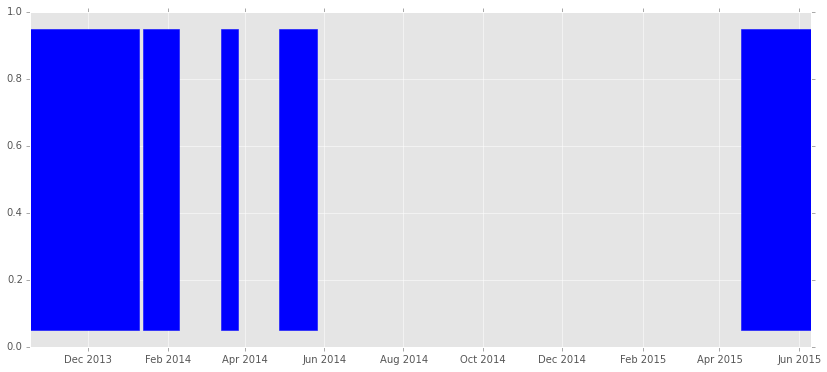

In [9]:
mains_good_sections.plot()

##Find out what power types are available##

In [10]:
mains.available_power_ac_types()

['apparent', 'reactive']

In [11]:
mains_energy = mains.total_energy(sections=mains_good_sections)
mains_energy

reactive     203.194441
apparent    3387.119111
dtype: float64

In [16]:
whole_house = nilmtk.global_meter_group.select()
whole_house.select(building=1).total_energy()

Calculating total_energy for ElecMeterID(instance=1, building=1, dataset='gjwdata') ...   

reactive     203.202124
apparent    3387.235051
dtype: float64

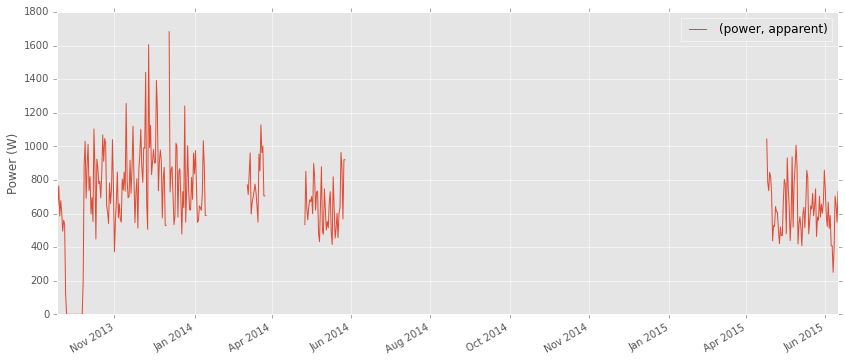

In [17]:
whole_house.plot()


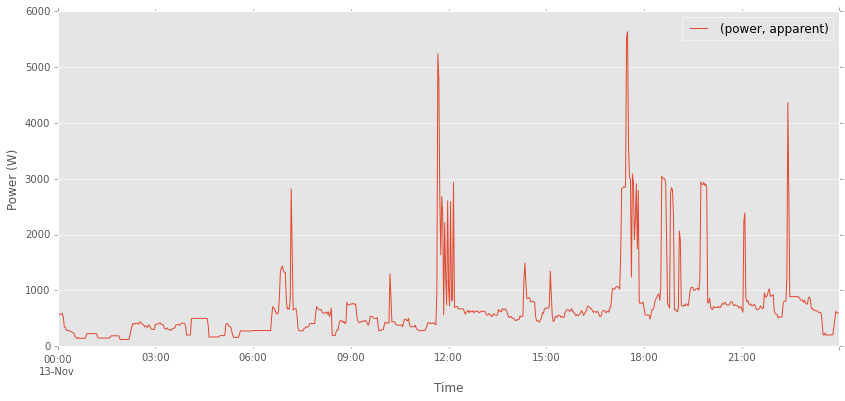

In [26]:
gjw.set_window(start='2013-11-13 00:00:00', end='2013-11-14 00:00:00')
elec.plot();
plt.xlabel("Time");

In [13]:
mains = elec.mains()

In [15]:
m = [mains.meters[1]]


AttributeError: 'ElecMeter' object has no attribute 'meters'

In [22]:
m.power_series_all_data()

2013-05-24 05:30:00+05:30    282.744995
2013-05-24 05:30:01+05:30    288.757996
2013-05-24 05:30:02+05:30    288.757996
2013-05-24 05:30:03+05:30    297.394012
2013-05-24 05:30:04+05:30    303.722992
2013-05-24 05:30:05+05:30    297.273987
2013-05-24 05:30:06+05:30    297.330994
2013-05-24 05:30:07+05:30    297.330994
2013-05-24 05:30:08+05:30    282.475006
2013-05-24 05:30:09+05:30    282.580994
2013-05-24 05:30:10+05:30    282.899994
2013-05-24 05:30:11+05:30    282.915985
2013-05-24 05:30:12+05:30    283.238007
2013-05-24 05:30:13+05:30    283.238007
2013-05-24 05:30:14+05:30    283.174011
...
2013-08-05 21:02:46+05:30    696.109985
2013-08-05 21:02:49+05:30    696.047974
2013-08-05 21:02:50+05:30    695.791992
2013-08-05 21:02:53+05:30    695.333008
2013-08-05 21:02:54+05:30    695.291992
2013-08-05 21:02:57+05:30    695.656982
2013-08-05 21:02:58+05:30    695.742004
2013-08-05 21:03:01+05:30    696.257019
2013-08-05 21:03:04+05:30    696.877991
2013-08-05 21:03:07+05:30    696.685

In [23]:
m.total_energy()

active      1005.572193
reactive      96.815441
apparent    1043.941205
dtype: float64

In [10]:
import time
start  =  time.time()
elec.fraction_per_meter()
end  =  time.time()

/home/nipun/git/nilmtk/nilmtk/preprocessing/clip.py:50: RuntimeWarning: No measurement limits for ('frequency', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)
/home/nipun/git/nilmtk/nilmtk/preprocessing/clip.py:50: RuntimeWarning: No measurement limits for ('voltage', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)
/home/nipun/git/nilmtk/nilmtk/preprocessing/clip.py:50: RuntimeWarning: No measurement limits for ('pf', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)
/home/nipun/git/nilmtk/nilmtk/preprocessing/clip.py:50: RuntimeWarning: No measurement limits for ('current', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)


In [14]:
print elec.fraction_per_meter()

12/12 ElecMeter(instance=12, building=1, dataset='iAWE', appliances=[Appliance(type='motor', instance=1)])1                     NaN
2                     NaN
3                     NaN
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8                     NaN
9                     NaN
10                    NaN
11                    NaN
12                    NaN
(1, 1, iAWE)     0.192552
(2, 1, iAWE)     0.519530
(3, 1, iAWE)     0.049750
(4, 1, iAWE)     0.103877
(5, 1, iAWE)     0.103186
(6, 1, iAWE)     0.001082
(7, 1, iAWE)     0.021384
(8, 1, iAWE)     0.000453
(9, 1, iAWE)     0.000403
(10, 1, iAWE)    0.006101
(11, 1, iAWE)    0.001146
(12, 1, iAWE)    0.000536
dtype: float64


In [12]:
print end - start

7.8085038662


In [13]:
elec.select_top_k(k=4)

,1,2,3,4,5,6,7,8,9,10,11,12
active,360.496060,1005.572193,82.958314,203.569523,203.889213,2.152638,24.351495,0.885766,0.722616,11.495919,0.558716,1.077918
apparent,386.911386,1043.941205,99.966983,208.730314,207.341398,2.173996,42.969043,0.911080,0.810098,12.258396,2.302620,NaN
reactive,30.660539,96.815441,53.965398,42.482991,35.209142,0.018759,0.002313,0.000528,0.249570,0.000176,2.087380,NaN


In [14]:
elec.energy_per_meter()

,1,2,3,4,5,6,7,8,9,10,11,12
active,360.496060,1005.572193,82.958314,203.569523,203.889213,2.152638,24.351495,0.885766,0.722616,11.495919,0.558716,1.077918
apparent,386.911386,1043.941205,99.966983,208.730314,207.341398,2.173996,42.969043,0.911080,0.810098,12.258396,2.302620,NaN
reactive,30.660539,96.815441,53.965398,42.482991,35.209142,0.018759,0.002313,0.000528,0.249570,0.000176,2.087380,NaN


In [16]:
elec.total_energy?
